# Stuying the harmonic expansions of functions

## Preliminaries

### Spherical coordinate system

A vector is written as $\mathbf{r}=\left(r,\varphi,\theta\right)^t$, with $r \in [0,\infty)$, $\varphi \in [0,2\pi)$ and $\theta \in [0,\pi]$, which in Cartesian coordinates is equivalent to $\mathbf{r}=r\left(\sin \theta \cos \varphi,\sin \theta \sin \varphi,\cos \theta\right)^t$. The unitary vectors of the spherical coordinate system can be written in Cartesian coordinates as
$$\begin{align*}
    &\widehat{\mathbf{e}}_r= (\sin \theta \cos \varphi , \sin \theta \sin \varphi , \cos \theta )^t, \\
    &\widehat{\mathbf{e}}_\theta=(\cos \theta \cos \varphi , \cos \theta \sin \varphi , -\sin \theta  )^t, \\
    &\widehat{\mathbf{e}}_{\varphi}=(-\sin \varphi , \cos \varphi , 0 )^t.
\end{align*}$$

Also, the gradient operator in spherical coordinates:
$$\begin{align*}
    \nabla f&=\frac{\partial f}{\partial r} \widehat{\mathbf{e}}_r+\frac{1}{r} \frac{\partial f}{\partial \theta} \widehat{\mathbf{e}}_\theta+\frac{1}{r \sin \theta} \frac{\partial f}{\partial \varphi} \widehat{\mathbf{e}}_{\varphi}
\end{align*}$$

### Real spherical harmonics

Real spherical harmonics of degree $l$ and order $m$ are defined using spherical coordinates:
$$\begin{align}
		 Y_{l,m}\left(\theta,\varphi\right) &:= \sqrt{ (2-\delta_{m,0}) \frac{\left(2l+1\right)\left(l-m\right)!}{4 \pi \left(l+m\right)!}} P_l^{m} \left(\cos\theta\right) \cos m \varphi , \mbox{ and}\\
		Y_{l,-m}\left(\theta,\varphi\right) &:= \sqrt{ (2-\delta_{m,0})\frac{\left(2l+1\right)\left(l-m\right)!}{4 \pi \left(l+m\right)!}} P_l^{m} \left(\cos\theta\right) \sin m \varphi ,
\end{align}$$
with $l\in \mathbb{N}_0$, $m\in \mathbb{Z}$ such that $0\leq m\leq l$. If $m=0$, then $\delta_{m,0}=1$, and it is zero otherwise. $P_l^m$ are the associated Legendre functions of degree $l$ and  order $m$ defined as:
$$P_{l}^m\left(x\right) := (-1)^m \left( 1- x^2\right)^{\frac{m}{2}} \frac{d^m}{dx^m}P_l(x), \quad \mbox{with} \quad P_{l}\left(x\right) := \frac{1}{2^ll!}\frac{d^l}{dx^l}(x^2-1)^l.$$

Here, the term $(-1)^m$ is the Condon-Shortley phase factor.

### Orthonormal basis

Spherical harmonics are dense in $C(\mathbb{S}^2)$, with $\mathbb{S}^2$ the surface of the unit sphere, and form a complete orthonormal system in $L^2(\mathbb{S}^2)$ with respect to the internal product defined by:
$$\left( \psi , \xi \right)_{L^2(\mathbb{S}^2)} = \int_{0}^{2\pi}\int_{0}^{\pi} \psi\left(\theta,\varphi\right) \xi\left(\theta,\varphi\right) \sin\left(\theta\right) d\theta d\varphi,$$
They also are orthogonal in $H^1(\mathbb{S}^2)$.

This means that any function in $L^2(\mathbb{S}^2)$ can be written as:

$$f(\theta,\varphi) = \sum_{l=0}^\infty \sum_{m=-l}^{m=l} f_{l,m} Y_{l,m}(\theta, \varphi)$$
with $f_{l,m}\in \mathbb{R}$.

### Comments about the code.

The module `biosspheres.miscella.harmonicex` give us an approximation of the $f_{l,m}$ coefficients for some functions. Aditionally, the package SHTOOLS has a function to approximate $f_{l,m}$ given the values of the function in some points in the surface of the sphere, see [SHTOOLS - spherical harmonic transforms](https://shtools.github.io/SHTOOLS/python-spherical-harmonic-transforms.html).

## Constant function

A function of the form $f(\mathbf{x}) = c$ has only the first $f_{l,m}$ different from zero.

The following is the known dirichlet expansion for $f(\mathbf{x}) = $ `cte`:

In [1]:
import numpy as np
import biosspheres.miscella.harmonicex as harmonicex

cte = 5.
big_l = 3
dirichlet_expansion = harmonicex.function_cte_dirichlet(big_l, cte, azimuthal=False)
dirichlet_expansion

array([17.72453851,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

The following is the approximated dirichlet expansion with the package SHTOOLS, from the values in the sphere.

In [2]:
import pyshtools
import biosspheres.miscella.auxindexes as auxindexes
import biosspheres.quadratures.sphere as quadratures

max_l = big_l
quantity_theta_points, quantity_phi_points, w, pre_vector = quadratures.gauss_legendre_trapezoidal_2d(max_l)
grid_analytic = np.ones((quantity_theta_points, quantity_phi_points)) * cte
coefficients = pyshtools.expand.SHExpandGLQ(grid_analytic, w, pre_vector[2, :, 0], norm=4, csphase=-1, lmax_calc=max_l)
dirichlet_expansion_2 = np.empty_like(dirichlet_expansion)

pesykus, p2_plus_p_plus_q, p2_plus_p_minus_q = auxindexes.pes_y_kus(max_l)
eles = np.arange(0, max_l + 1)
l_square_plus_l = eles * (eles + 1)

dirichlet_expansion_2[p2_plus_p_plus_q] = coefficients[0, pesykus[:, 0], pesykus[:, 1]]
dirichlet_expansion_2[p2_plus_p_minus_q] = coefficients[1, pesykus[:, 0], pesykus[:, 1]]
dirichlet_expansion_2[l_square_plus_l] = coefficients[0, eles, 0]

dirichlet_expansion_2

array([ 1.77245385e+01, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  1.06581410e-14,  0.00000000e+00,
        5.80672801e-16, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -2.76647309e-16])

The difference between the results is

In [3]:
np.linalg.norm(dirichlet_expansion - dirichlet_expansion_2)

1.2825629922959107e-14

## Linear function

A function of the form $f(\mathbf{x}) = \mathbf{c} \cdot \mathbf{x} + c_3$ has only the two first degrees of coefficients $f_{l,m}$ different from zero.

Example with
$$f(\mathbf{x}) = \begin{pmatrix}0 \\ 0 \\ cte \end{pmatrix} \cdot \mathbf{x}$$
where the only coefficient different from zero is $f_{1,0}$

The following is the approximated dirichlet expansion with the package SHTOOLS, from the values in a sphere of radius `r`.

In [4]:
cte = 5.
r = 1.3
big_l = 3
max_l = big_l
quantity_theta_points, quantity_phi_points, w, pre_vector = quadratures.gauss_legendre_trapezoidal_2d(max_l)
grid_analytic = pre_vector[2, :, :] * (cte * r)
coefficients = pyshtools.expand.SHExpandGLQ(grid_analytic, w, pre_vector[2, :, 0], norm=4, csphase=-1, lmax_calc=max_l)
dirichlet_expansion_2 = np.empty((big_l+1)**2)

pesykus, p2_plus_p_plus_q, p2_plus_p_minus_q = auxindexes.pes_y_kus(max_l)
eles = np.arange(0, max_l + 1)
l_square_plus_l = eles * (eles + 1)

dirichlet_expansion_2[p2_plus_p_plus_q] = coefficients[0, pesykus[:, 0], pesykus[:, 1]]
dirichlet_expansion_2[p2_plus_p_minus_q] = coefficients[1, pesykus[:, 0], pesykus[:, 1]]
dirichlet_expansion_2[l_square_plus_l] = coefficients[0, eles, 0]

dirichlet_expansion_2

array([ 0.00000000e+00, -0.00000000e+00,  1.33032472e+01,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -1.81613969e-16,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        5.87474805e-15,  0.00000000e+00,  4.04347043e-16,  0.00000000e+00])

## Point source

TypeError: only integer scalar arrays can be converted to a scalar index

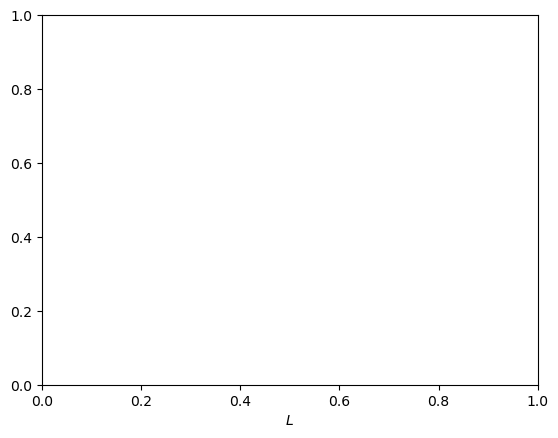

In [5]:
import matplotlib.pyplot as plt

max_eles = np.asarray([20, 46, 80, 172], dtype=int),
radius = 10.,
sigma_e = 5.,
intensity = 1.,
distances = np.asarray([50., 20., 15, 12])

eles_c = 2 * max_eles
markers = ['p', '*', 'x', '.']
plt.figure()
plt.xlabel('$L$')
for counter in np.arange(0, len(max_eles)):
    num = max_eles[counter] + 1
    p_0 = np.asarray([0., 0., distances[counter]])
    l2_norm = np.zeros(max_eles[counter] // 2)
    final_length, total_weights, pre_vector = quadratures. \
        gauss_legendre_trapezoidal_1d(eles_c[counter])
    grid_analytic = np.zeros(final_length)
    legendre_functions = np.zeros((num, final_length))
    full_expansion = np.zeros((num, 1))
    full_expansion[:, 0] = harmonicex. \
        point_source_coefficients_dirichlet_expansion_azimuthal_symmetry(
        max_eles[counter], radius, distances[counter], sigma_e,
        intensity)
    for ii in np.arange(0, final_length):
        grid_analytic[ii] = mathfunctions. \
            point_source(radius * pre_vector[:, ii], p_0, sigma_e)
        legendre_functions[:, ii] = \
            pyshtools.legendre.PlON(max_eles[counter], pre_vector[2, ii])
    for el in np.arange(0, max_eles[counter], 2):
        grid_expansion = np.sum(
            legendre_functions[0:el + 1, :] * full_expansion[0:el + 1],
            axis=0)
        l2_norm[el // 2 + np.mod(el, 2)] = np.sqrt(
            np.sum((grid_analytic - grid_expansion)**2 * total_weights))
    phi_norm = np.sqrt(np.sum(grid_analytic**2 * total_weights))
    plt.semilogy(np.arange(0, max_eles[counter], 2), l2_norm / phi_norm,
                 marker=markers[counter],
                 label='$d =$ ' + str(distances[counter]))
y_label = '$RE2(\\phi_{e_3},\\phi_{e_3}^L)_1$'
plt.ylabel(y_label)
plt.legend(edgecolor='white')
plt.show()